In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import *
from sklearn.metrics import *

In [34]:
from sklearn.impute import KNNImputer

In [35]:
import matplotlib.pyplot as plt

In [36]:
def box(data1):
  for col in data1.columns:
    sns.boxplot(data=data1,y=col)
    tit1="Boxplot for the column {}".format(col)
    plt.title(tit1)
    plt.show()
def distribution(data1):
  for col in data1.columns:
    sns.distplot(data1[col])
    tit1="Distribution for the column {}".format(col)
    plt.title(tit1)
    plt.show()

In [37]:
data=pd.read_csv("AnonymousDataset.csv")
data.head()

,col1,classLabel,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel1,PredictLabel2
0,119513,0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,0,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,0,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,0,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,1,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


#Data Preprocessing

In [38]:
data.shape

(198, 35)

There are 198 rows and 35 columns in the dataset

In [39]:
data.columns#Dataset columns

Index(['col1', 'classLabel', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8',
       'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16',
       'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24',
       'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32',
       'col33', 'PredictLabel1', 'PredictLabel2'],
      dtype='object')

##Data Entry Errors

In [40]:
#Finding the datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   col1           198 non-null    int64  
 1   classLabel     198 non-null    int64  
 2   col3           198 non-null    int64  
 3   col4           198 non-null    float64
 4   col5           198 non-null    float64
 5   col6           198 non-null    float64
 6   col7           198 non-null    float64
 7   col8           198 non-null    float64
 8   col9           198 non-null    float64
 9   col10          198 non-null    float64
 10  col11          198 non-null    float64
 11  col12          198 non-null    float64
 12  col13          198 non-null    float64
 13  col14          198 non-null    float64
 14  col15          198 non-null    float64
 15  col16          198 non-null    float64
 16  col17          198 non-null    float64
 17  col18          198 non-null    float64
 18  col19     

We could see that all columns except PredictLabel2 is a number. Since the data shows that it is continuous it may have some data entry errors. 

In [41]:
data.iloc[:,-1].unique()

array(['5', '2', '0', '?', '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '24', '18', '16', '21'],
      dtype=object)

We could see that there is a '?' symbol in the dataset. It needs to be corrected by replacing it by nan value. Then the entire column can be converted to a number. 

In [42]:
last=data.iloc[:,-1]
data.iloc[:,-1]=last.replace('?',np.nan)

In [43]:
data.iloc[:,-1].unique()

array(['5', '2', '0', nan, '10', '1', '20', '6', '13', '4', '17', '15',
       '11', '9', '8', '7', '3', '14', '27', '24', '18', '16', '21'],
      dtype=object)

Now we need to convert into float data type since there exists a null value and remaining are integers

In [44]:
data.iloc[:,-1]=data.iloc[:,-1].astype('float64')

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   col1           198 non-null    int64  
 1   classLabel     198 non-null    int64  
 2   col3           198 non-null    int64  
 3   col4           198 non-null    float64
 4   col5           198 non-null    float64
 5   col6           198 non-null    float64
 6   col7           198 non-null    float64
 7   col8           198 non-null    float64
 8   col9           198 non-null    float64
 9   col10          198 non-null    float64
 10  col11          198 non-null    float64
 11  col12          198 non-null    float64
 12  col13          198 non-null    float64
 13  col14          198 non-null    float64
 14  col15          198 non-null    float64
 15  col16          198 non-null    float64
 16  col17          198 non-null    float64
 17  col18          198 non-null    float64
 18  col19     

Now all the columns are numeric data type

## Null Value Prediction
Here there is a need to check whether there are null values. If there are null values then we need to select suitable methods of imputation, preferably KNNImputation

In [46]:
data.isnull().sum()

col1             0
classLabel       0
col3             0
col4             0
col5             0
col6             0
col7             0
col8             0
col9             0
col10            0
col11            0
col12            0
col13            0
col14            0
col15            0
col16            0
col17            0
col18            0
col19            0
col20            0
col21            0
col22            0
col23            0
col24            0
col25            0
col26            0
col27            0
col28            0
col29            0
col30            0
col31            0
col32            0
col33            0
PredictLabel1    0
PredictLabel2    4
dtype: int64

We could see that there exists null values in the column 'PredictLabel2'. Hence we need to impute it. Since we already found that the column has integers we can round it off to integers.

In [47]:
knn_impute=KNNImputer()
data['PredictLabel2']=np.around(knn_impute.fit_transform(data[['PredictLabel2']]))

In [48]:
data.isnull().any()

col1             False
classLabel       False
col3             False
col4             False
col5             False
col6             False
col7             False
col8             False
col9             False
col10            False
col11            False
col12            False
col13            False
col14            False
col15            False
col16            False
col17            False
col18            False
col19            False
col20            False
col21            False
col22            False
col23            False
col24            False
col25            False
col26            False
col27            False
col28            False
col29            False
col30            False
col31            False
col32            False
col33            False
PredictLabel1    False
PredictLabel2    False
dtype: bool

There are no NULL Values in the dataset.

#Exploratory Data Analysis

## Descriptive Statistics
Gives us the basic statistical analysis of data with respect to count mean, standard deviation, minimum, maximum, 1st, 2nd and 3rd Quantiles

In [49]:
data.describe()

,col1,classLabel,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel1,PredictLabel2
count,1.980000e+02,198.000000,198.000000,198.000000,198.00000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000
mean,1.990469e+06,0.237374,46.732323,17.412323,22.27601,114.856566,970.040909,0.102681,0.142648,0.156243,0.086776,0.192754,0.062706,0.603346,1.264450,4.255394,70.228737,0.006762,0.031199,0.040750,0.015099,0.020555,0.003987,21.021818,30.139091,140.347778,1404.958586,0.143921,0.365102,0.436685,0.178778,0.323404,0.090828,2.847475,3.207071
std,2.889025e+06,0.426552,34.462870,3.161676,4.29829,21.383402,352.149215,0.012522,0.049898,0.070572,0.033877,0.027437,0.007240,0.310112,0.526467,2.194128,47.982255,0.002974,0.017613,0.020869,0.005504,0.009578,0.001938,4.242997,6.017777,28.892279,586.006972,0.022004,0.163965,0.173625,0.045181,0.075161,0.021172,1.937964,5.423445
min,8.423000e+03,0.000000,1.000000,10.950000,10.38000,71.900000,361.600000,0.074970,0.046050,0.023980,0.020310,0.130800,0.050250,0.193800,0.362100,1.153000,13.990000,0.002667,0.007347,0.010940,0.005174,0.007882,0.001087,12.840000,16.670000,85.100000,508.100000,0.081910,0.051310,0.023980,0.028990,0.156500,0.055040,0.400000,0.000000
25%,8.557452e+05,0.000000,14.000000,15.052500,19.41250,98.160000,702.525000,0.093900,0.110200,0.106850,0.063670,0.174075,0.056718,0.388200,0.921300,2.742500,35.365000,0.005001,0.019803,0.026810,0.011422,0.014795,0.002748,17.632500,26.210000,118.075000,947.275000,0.129325,0.248700,0.322150,0.152650,0.275950,0.076578,1.500000,0.000000
50%,8.863390e+05,0.000000,39.500000,17.290000,21.75000,113.700000,929.100000,0.101900,0.131750,0.151350,0.086075,0.189350,0.061715,0.533250,1.168500,3.767000,58.455000,0.006193,0.027880,0.036910,0.014175,0.017905,0.003719,20.525000,30.135000,136.500000,1295.000000,0.141850,0.351300,0.402350,0.179250,0.310300,0.086890,2.500000,1.000000
75%,9.279958e+05,0.000000,72.750000,19.580000,24.65500,129.650000,1193.500000,0.110975,0.172200,0.200500,0.103925,0.209325,0.066715,0.750900,1.463250,5.212750,92.477500,0.007973,0.038335,0.048970,0.017665,0.022880,0.004630,23.730000,33.555000,159.875000,1694.250000,0.154875,0.423675,0.541050,0.207125,0.358800,0.101375,3.500000,4.000000
max,9.411300e+06,1.000000,125.000000,27.220000,39.28000,182.100000,2250.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,1.819000,3.503000,13.280000,316.000000,0.031130,0.135400,0.143800,0.039270,0.060410,0.012560,35.130000,49.540000,232.200000,3903.000000,0.222600,1.058000,1.170000,0.290300,0.663800,0.207500,10.000000,27.000000


There are no negative values in the dataset

## Correlation Analysis

In [50]:
data1=data.iloc[:,2:]
data1=data1.drop(columns=['PredictLabel1'],axis=1)
data1.head()

,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel2
0,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0
1,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2.0
2,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,0.0
3,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


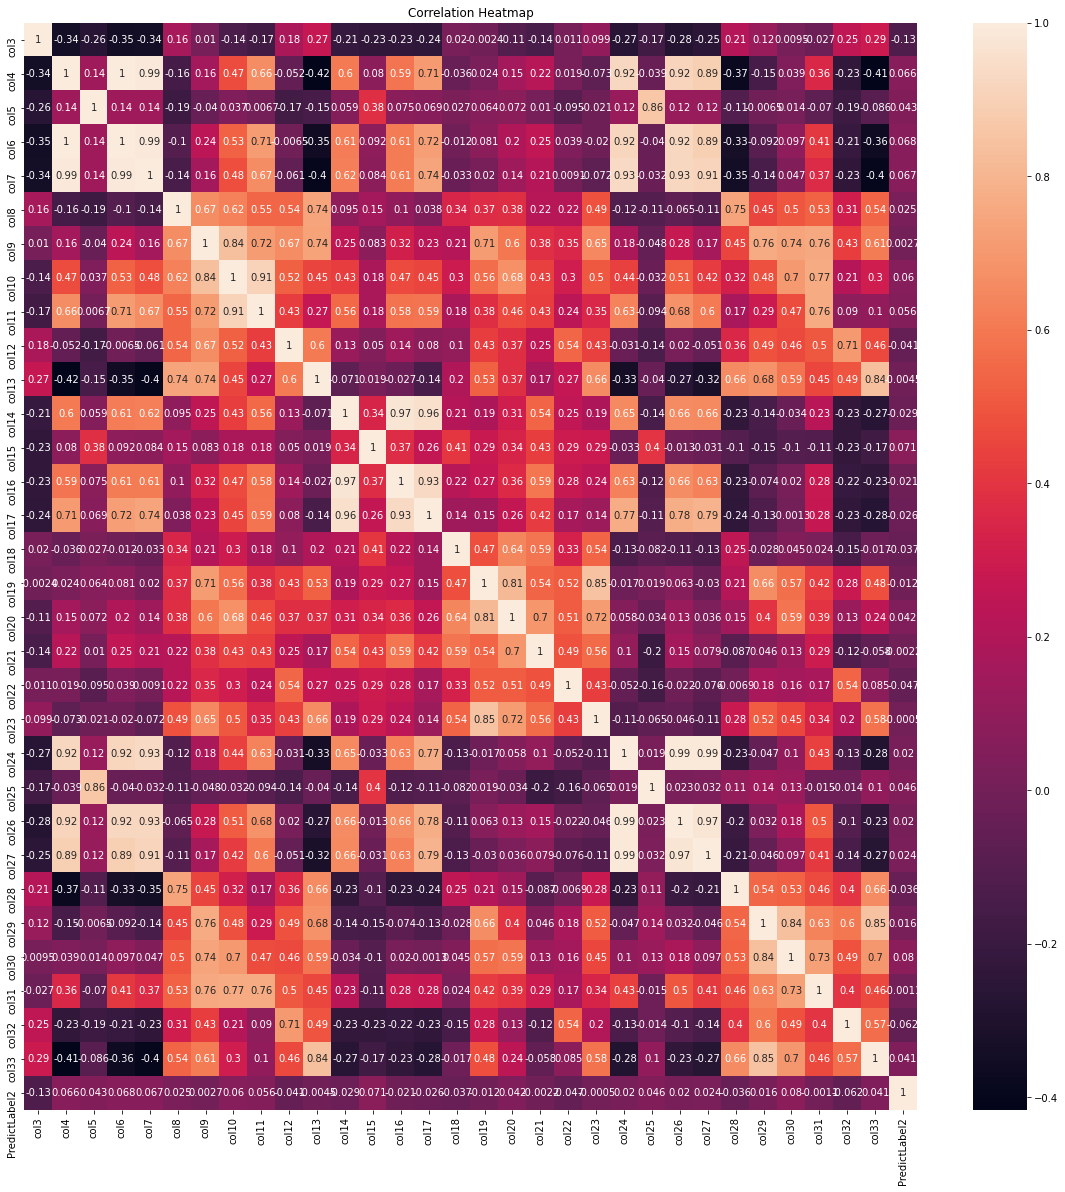

In [51]:
plt.figure(figsize=(20,20))
sns.heatmap(data1.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

There exists high correlation between several predictor variables which indicates presence of multicollinearity in the dataset. But there exists less correlation between the predictor variables and the column 'PredictLabel2'. 

## Distribution Plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


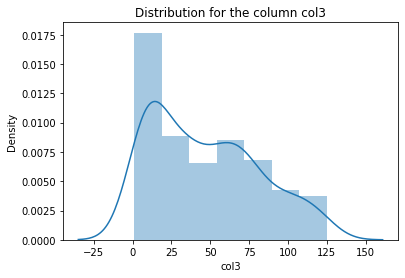

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


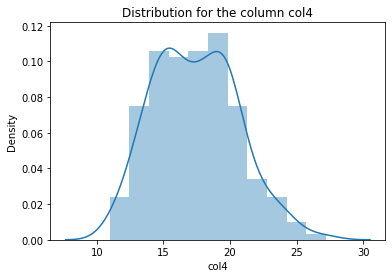

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


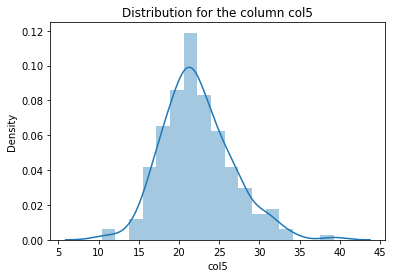

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


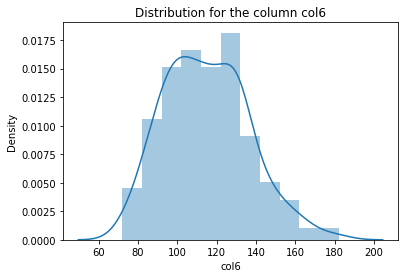

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


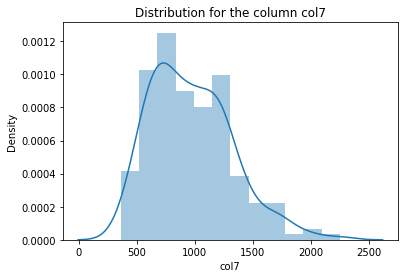

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


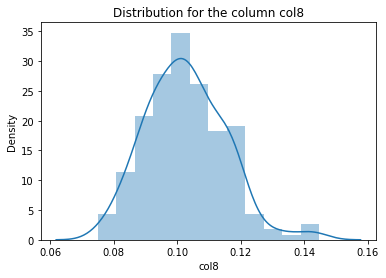

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


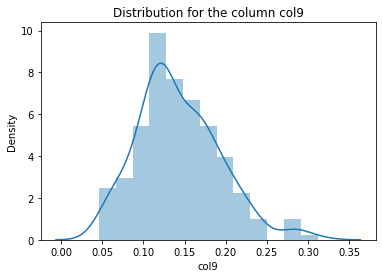

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


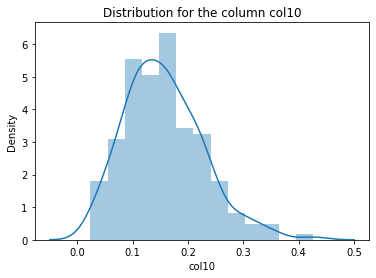

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


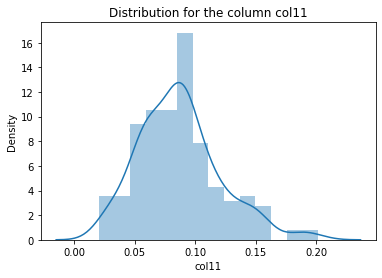

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


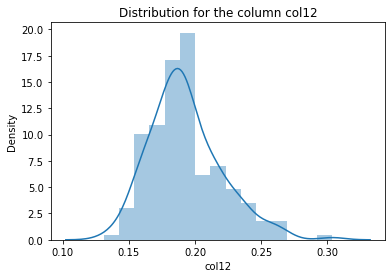

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


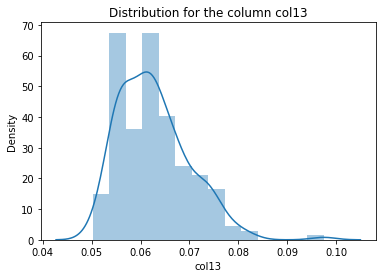

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


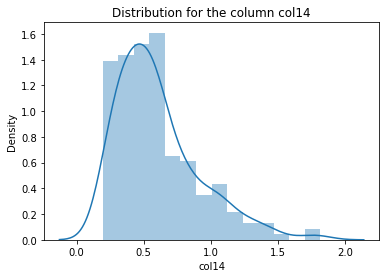

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


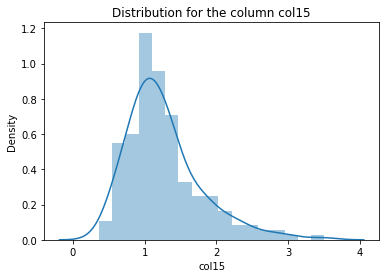

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


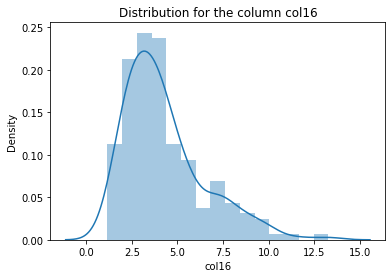

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


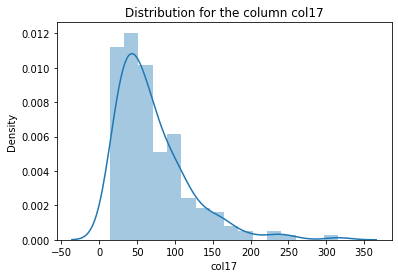

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


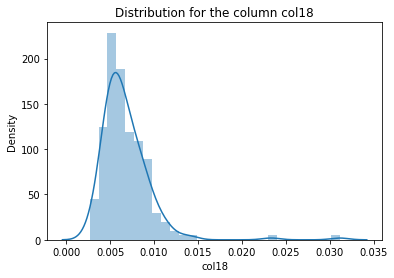

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


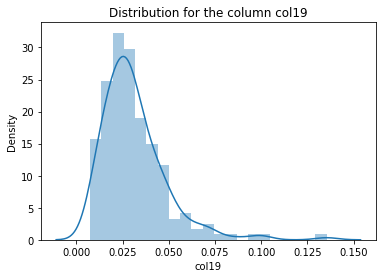

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


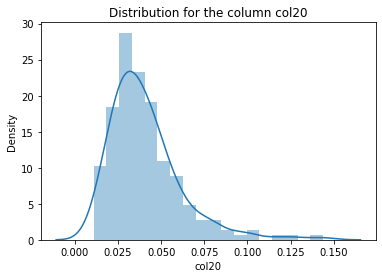

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


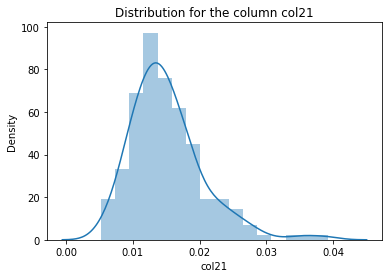

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


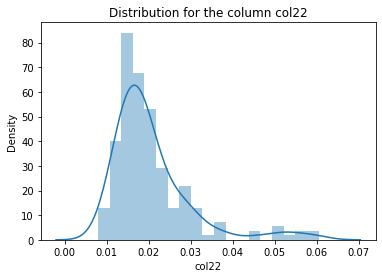

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


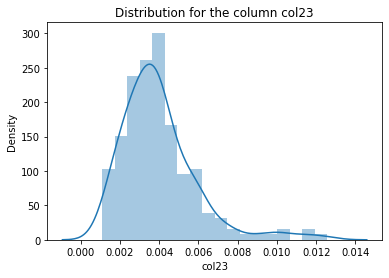

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


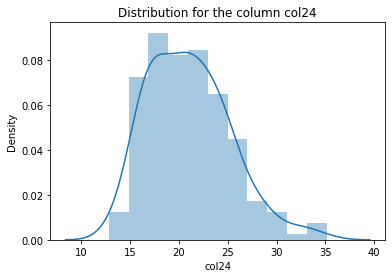

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


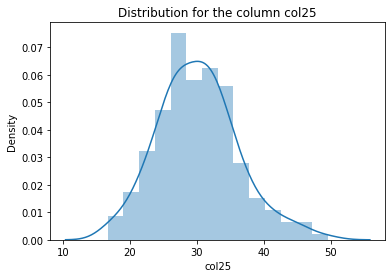

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


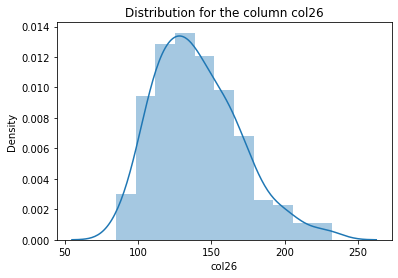

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


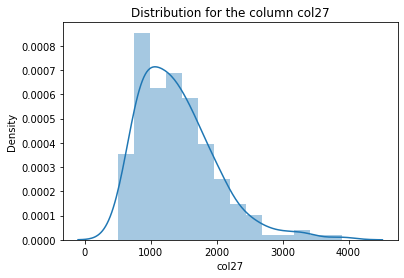

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


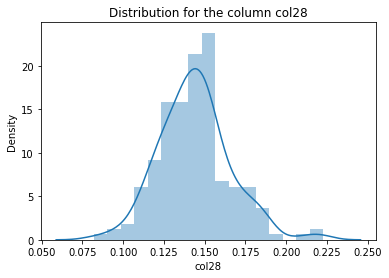

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


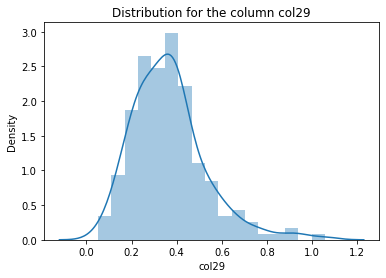

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


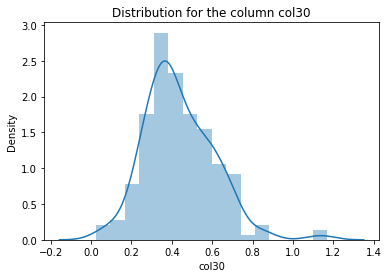

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


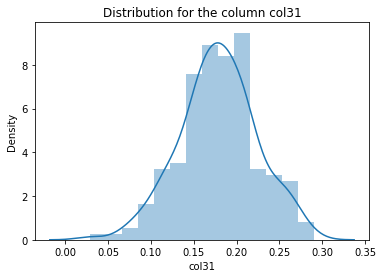

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


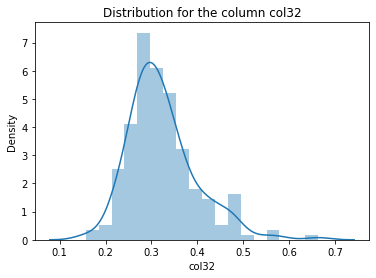

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


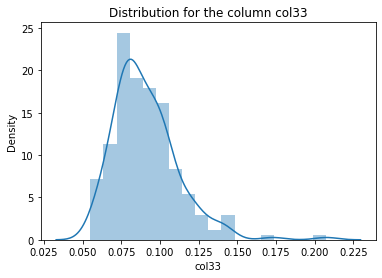

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


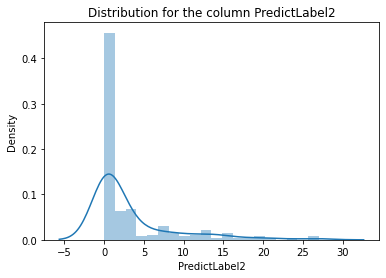

In [52]:
distribution(data1)

The distribution shows that some of the columns follow symmetric normal distribution. Meanwhile some columns are skewed

## Outlier Detection

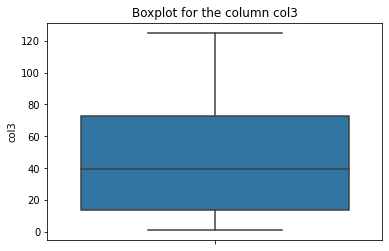

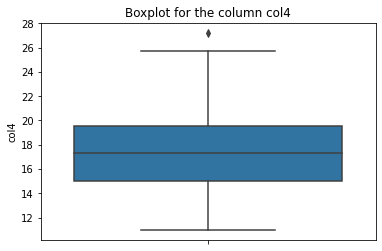

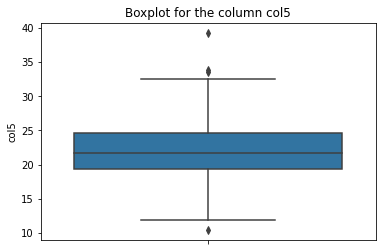

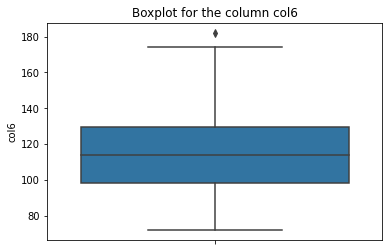

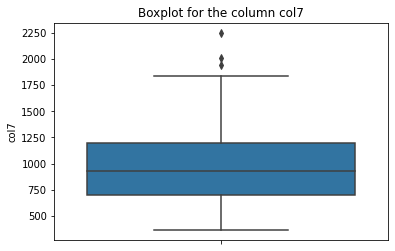

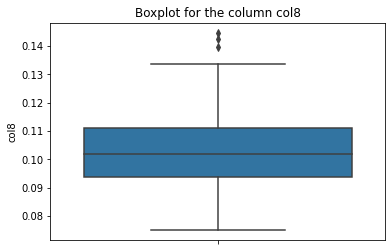

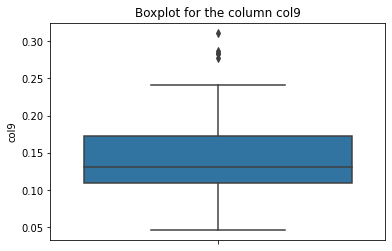

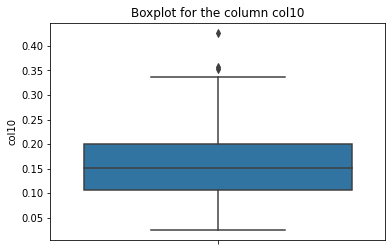

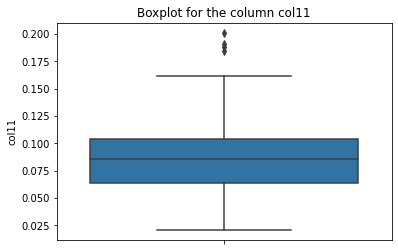

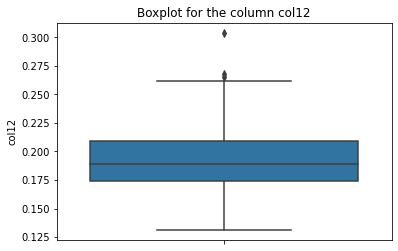

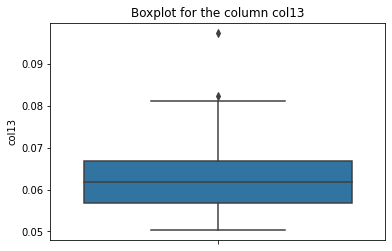

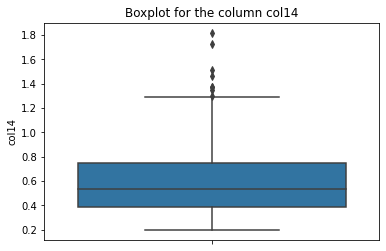

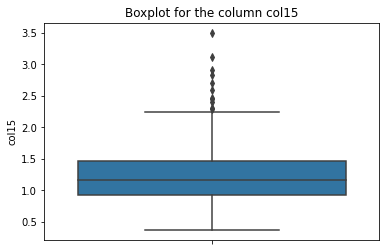

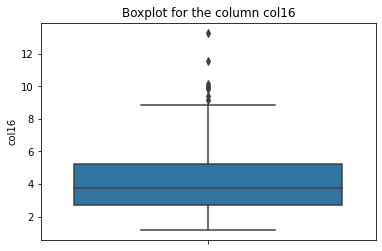

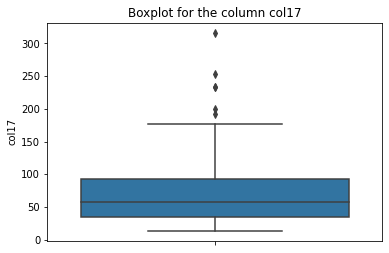

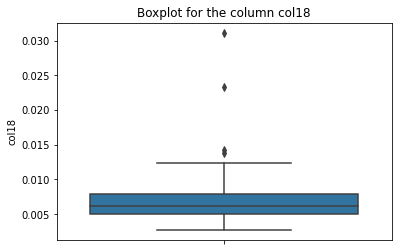

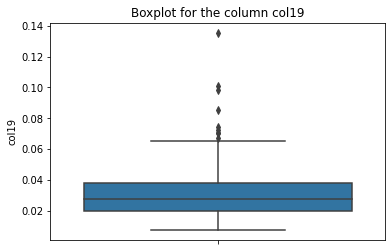

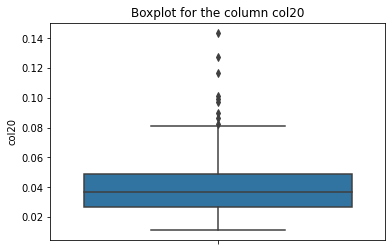

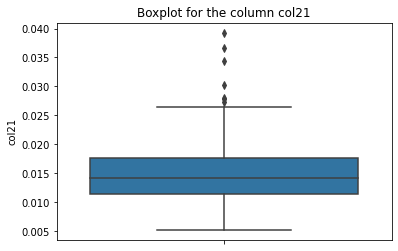

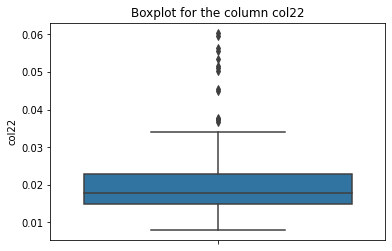

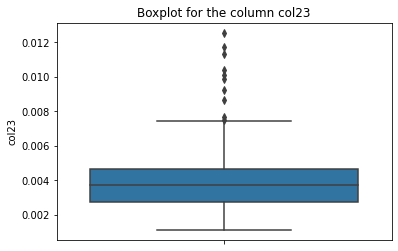

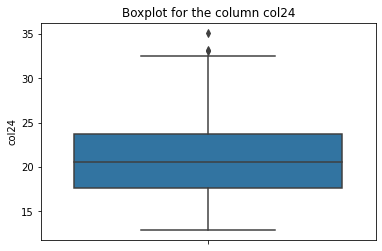

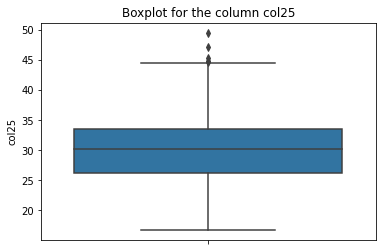

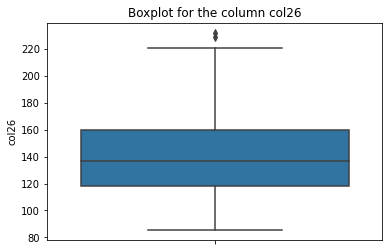

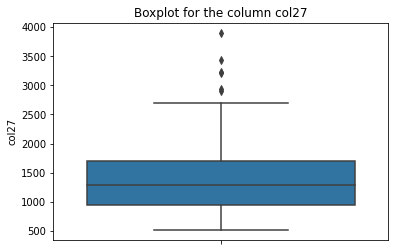

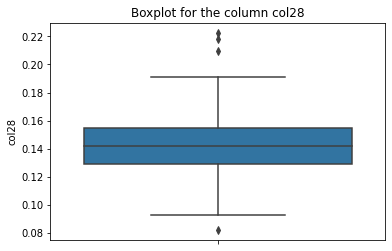

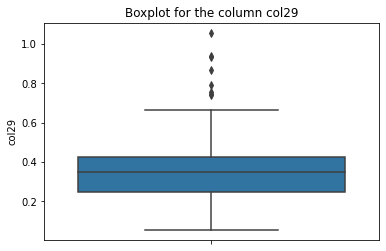

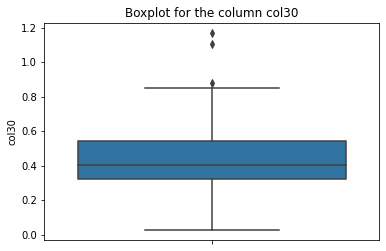

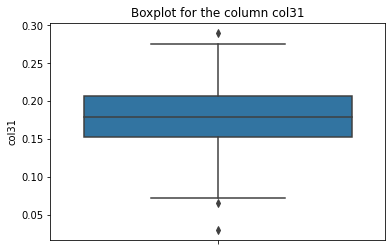

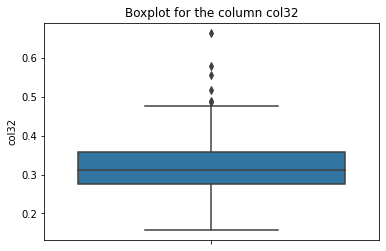

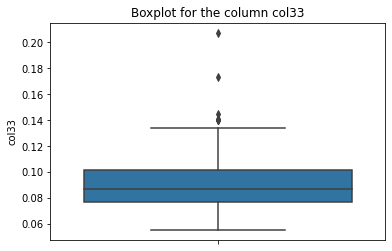

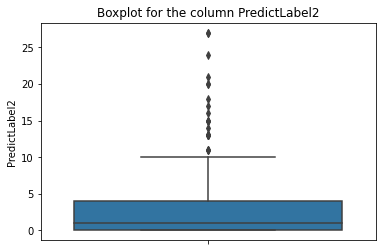

In [53]:
box(data1)

We could see that there exists considerably less number of outliers in the dataset. 

### Handling of Outliers
#### Normalization

In [54]:
norm=Normalizer()
data_norm1=pd.DataFrame(norm.fit_transform(data1),columns=data1.columns)

In [55]:
data_norm1.head()

,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,PredictLabel2
0,0.017520,0.010184,0.015599,0.066408,0.572523,0.000054,0.000059,0.000061,0.000040,0.000105,0.000036,0.000353,0.001068,0.002245,0.040438,0.000003,0.000008,0.000018,0.000006,0.000010,0.000002,0.012225,0.020957,0.078955,0.811592,0.000068,0.000109,0.000177,0.000066,0.000151,0.000046,0.002826
1,0.026864,0.007923,0.004571,0.054079,0.440827,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003782,0.067555,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011177,0.007632,0.081295,0.889140,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052,0.000881
2,0.048375,0.008912,0.007273,0.057342,0.572581,0.000037,0.000050,0.000052,0.000034,0.000097,0.000025,0.000244,0.000255,0.001638,0.034259,0.000003,0.000014,0.000014,0.000008,0.000013,0.000002,0.010384,0.008749,0.066349,0.812790,0.000050,0.000144,0.000142,0.000085,0.000181,0.000038,0.000000
3,0.173170,0.016078,0.028693,0.109224,0.543584,0.000201,0.000400,0.000340,0.000148,0.000366,0.000137,0.000698,0.001628,0.004850,0.038337,0.000013,0.000105,0.000080,0.000026,0.000084,0.000013,0.020992,0.037309,0.139197,0.799255,0.000295,0.001220,0.000967,0.000363,0.000935,0.000244,0.000000
4,0.013151,0.009882,0.006984,0.065802,0.631719,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.045998,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010978,0.008119,0.074131,0.767122,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037,0.000000


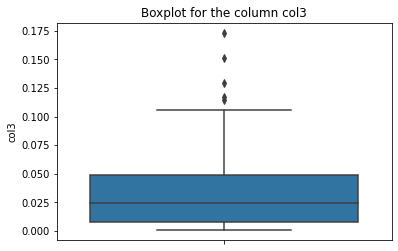

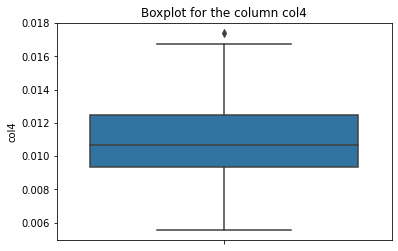

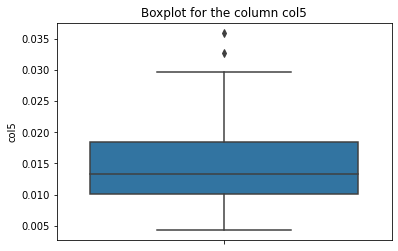

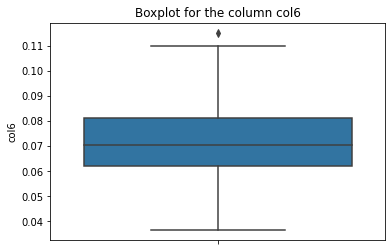

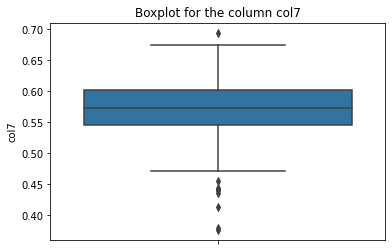

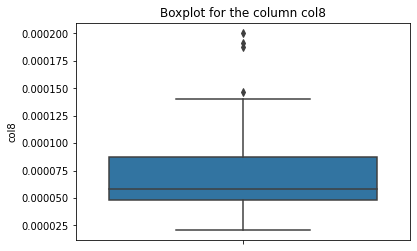

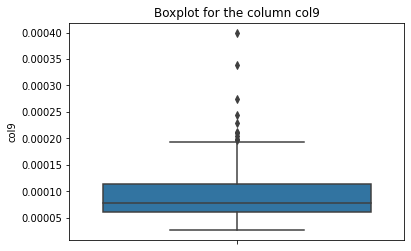

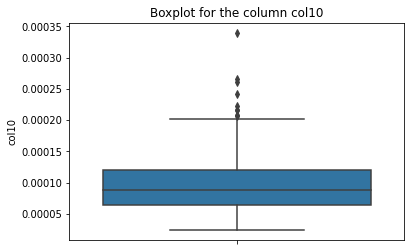

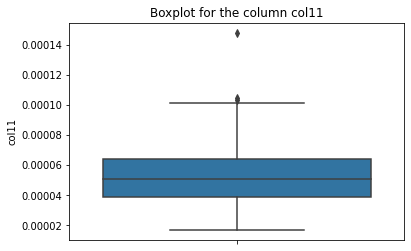

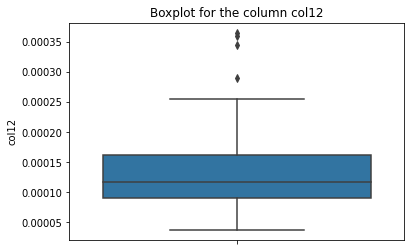

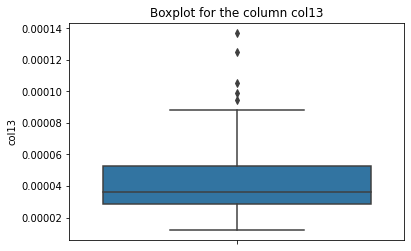

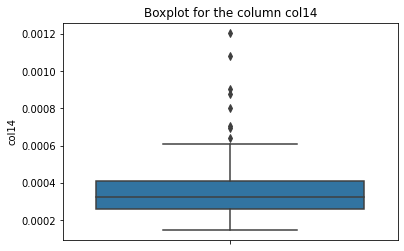

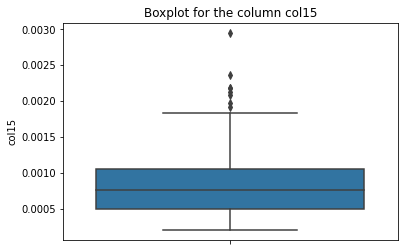

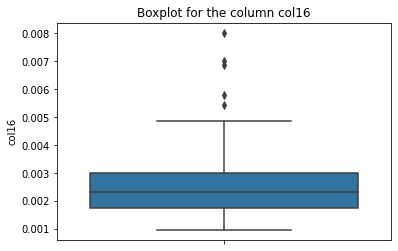

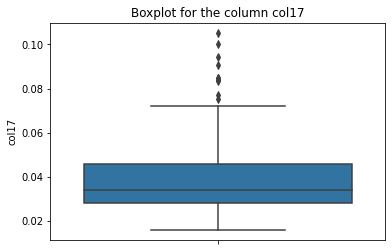

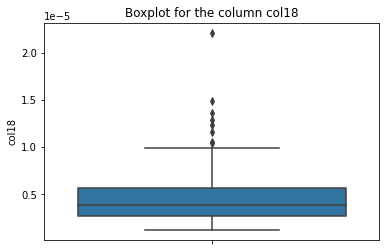

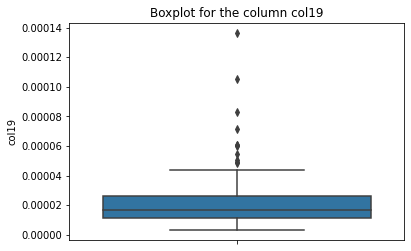

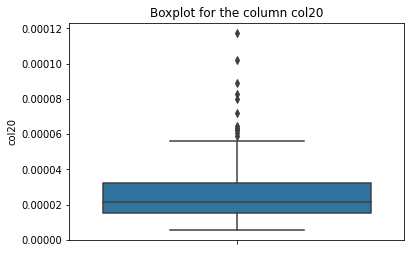

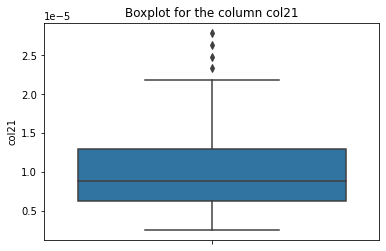

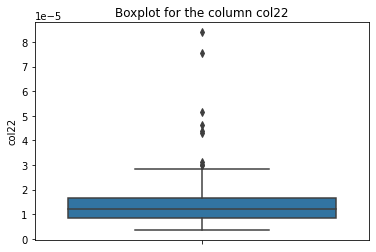

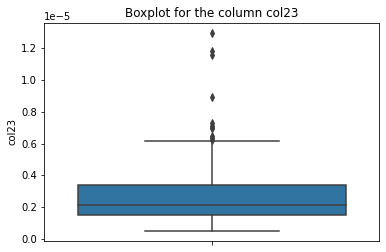

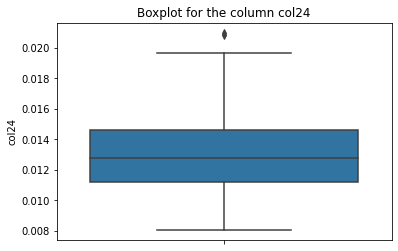

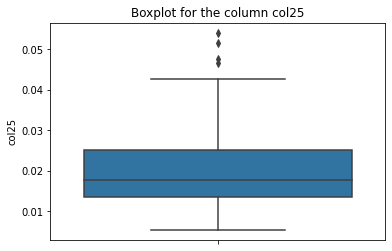

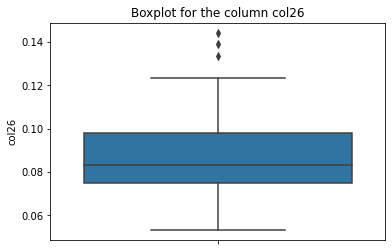

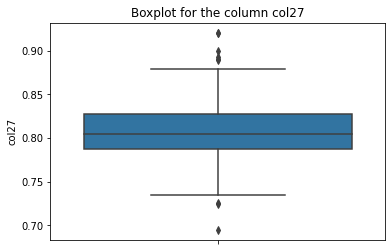

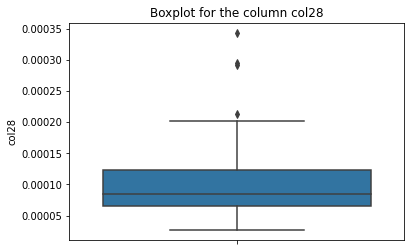

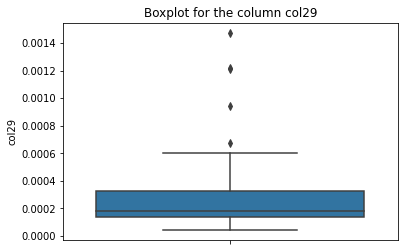

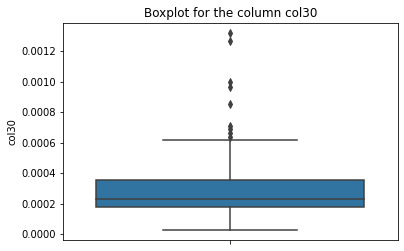

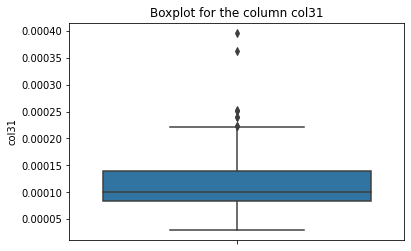

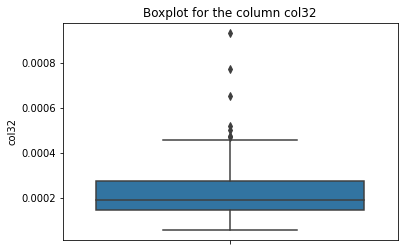

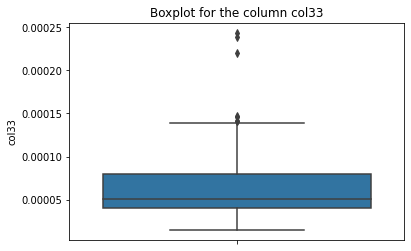

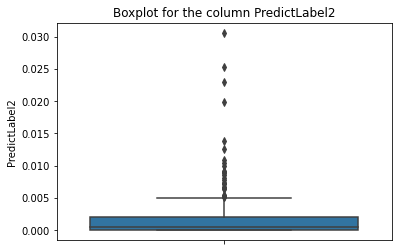

In [56]:
box(data_norm1)

#### Log Transformation

In [57]:
data_log=np.log10(data1.iloc[:,:-1])
data_log.head()

,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
0,1.491362,1.255755,1.440909,2.070038,3.005609,-1.022780,-0.984640,-0.964170,-1.151503,-0.729321,-1.198391,-0.204189,0.276462,0.599009,1.854610,-2.353302,-1.847406,-1.490394,-2.006387,-1.771087,-2.456553,1.335057,1.569140,2.145196,3.157154,-0.922632,-0.715344,-0.503070,-0.931814,-0.572352,-1.090819
1,1.785330,1.255031,1.016197,2.089198,3.000434,-0.926648,-0.556581,-0.522734,-0.832387,-0.616364,-1.103970,0.039414,-0.043207,0.933943,2.185825,-2.193888,-1.309450,-1.269783,-1.799423,-1.522445,-2.208099,1.404492,1.238799,2.266232,3.305136,-0.789949,-0.176787,-0.147581,-0.576099,-0.337148,-0.924818
2,2.064458,1.329805,1.241546,2.138303,3.137671,-1.053744,-0.924818,-0.901356,-1.087247,-0.632085,-1.221126,-0.232547,-0.214314,0.594171,1.914608,-2.209926,-1.462307,-1.481486,-1.743523,-1.509480,-2.297656,1.396199,1.321805,2.201670,3.289812,-0.925184,-0.462307,-0.466736,-0.692076,-0.363111,-1.042536
3,2.089905,1.057666,1.309204,1.889750,2.586700,-0.846185,-0.546835,-0.617263,-0.977984,-0.585528,-1.011263,-0.304869,0.062958,0.537189,1.435048,-2.040482,-1.127378,-1.247107,-1.728856,-1.224535,-2.035835,1.173478,1.423246,1.995065,2.754119,-0.678195,-0.062332,-0.163106,-0.589223,-0.177963,-0.761954
4,1.431364,1.307282,1.156549,2.130655,3.112940,-0.998699,-0.876802,-0.703335,-0.981716,-0.742561,-1.230401,-0.120789,-0.107182,0.735439,1.975156,-1.939680,-1.608888,-1.245040,-1.724689,-1.755475,-2.291154,1.352954,1.221936,2.182415,3.197281,-0.862013,-0.688246,-0.397940,-0.789147,-0.626353,-1.114752


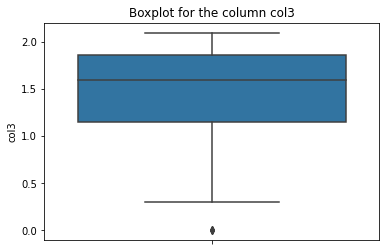

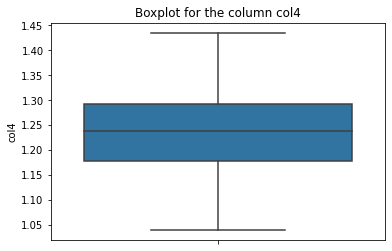

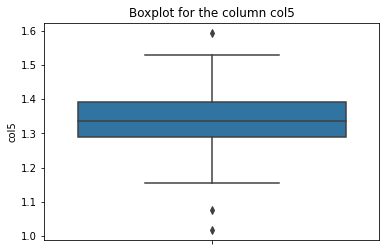

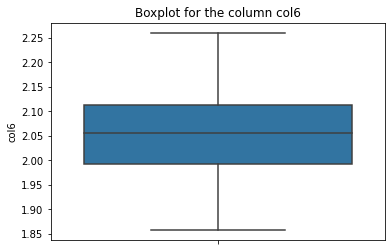

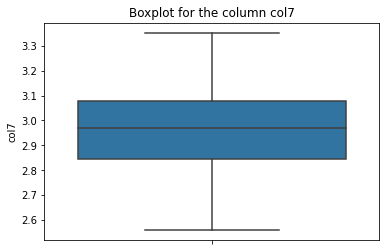

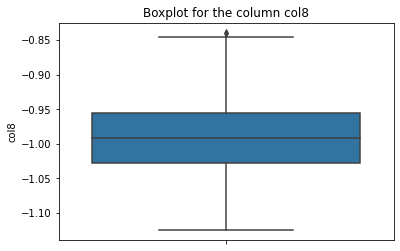

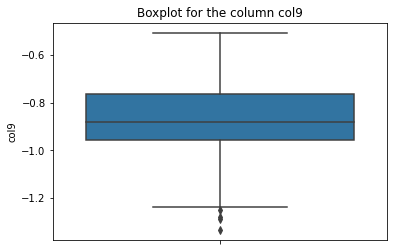

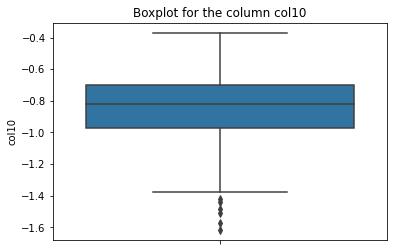

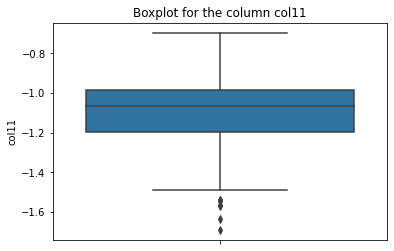

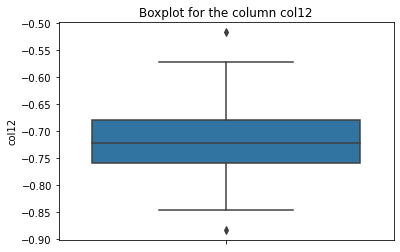

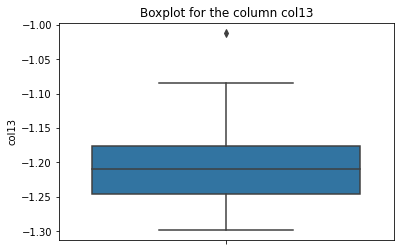

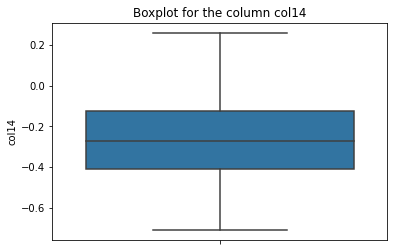

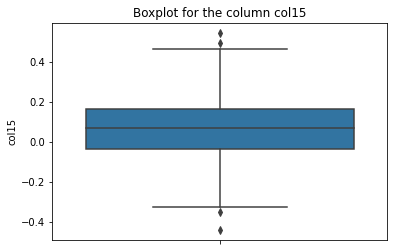

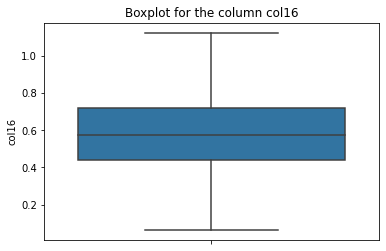

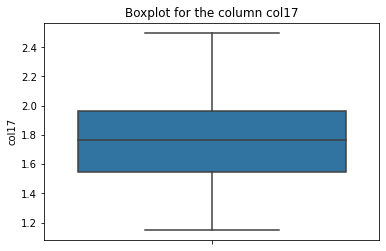

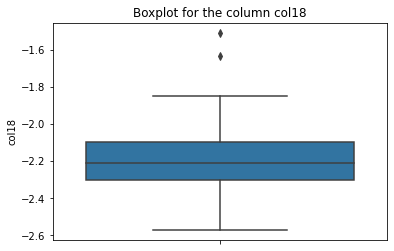

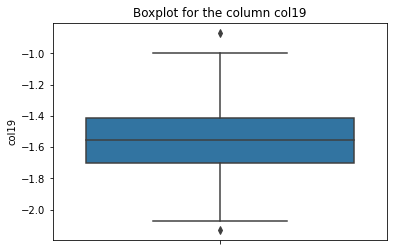

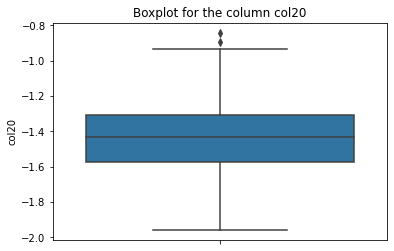

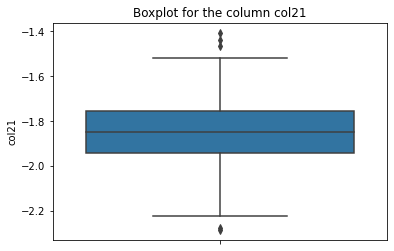

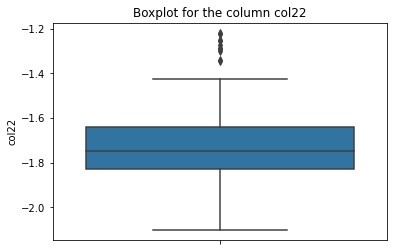

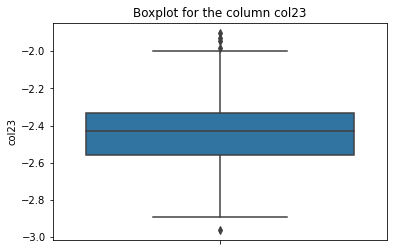

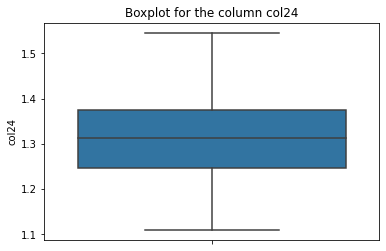

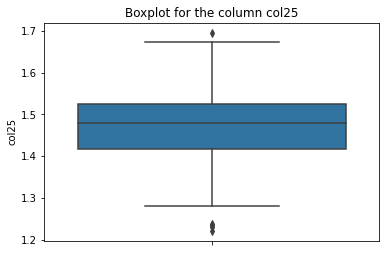

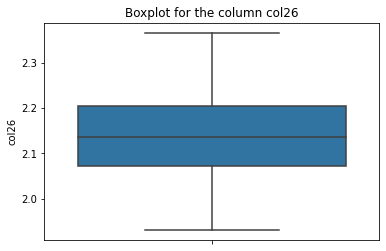

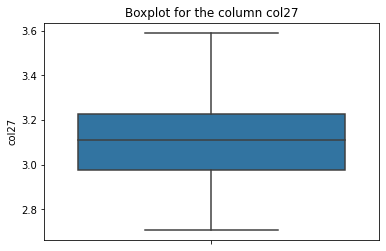

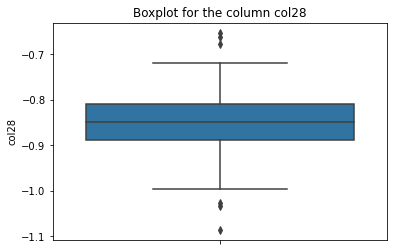

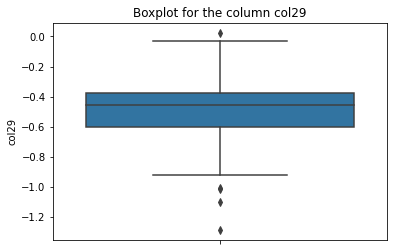

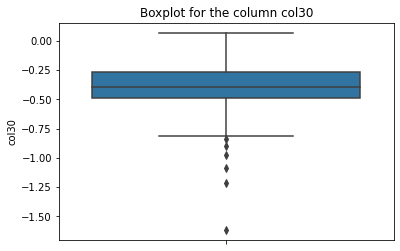

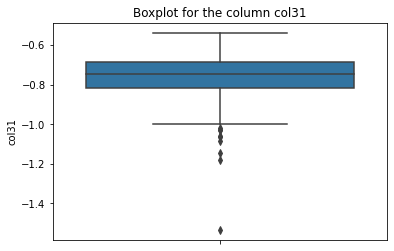

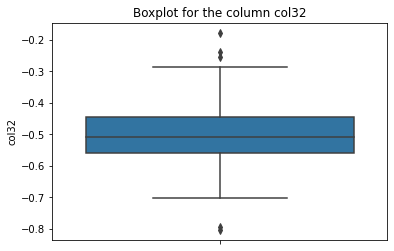

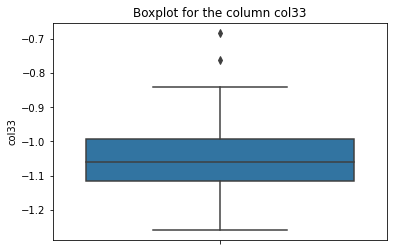

In [58]:
box(data_log)

The log transformation has removed outliers in some of the columns and also reduced it.

#### Conversion to Normal Data

In [59]:
qu=QuantileTransformer(output_distribution='normal')
data_qu=pd.DataFrame(qu.fit_transform(data_log),columns=data_log.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (198). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


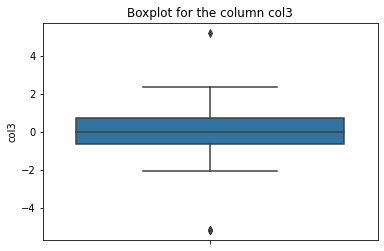

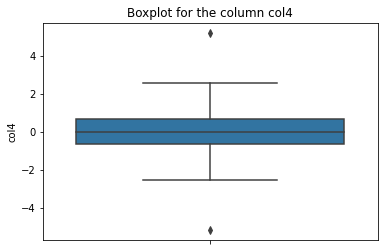

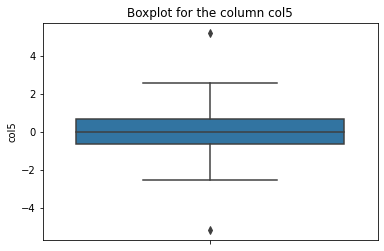

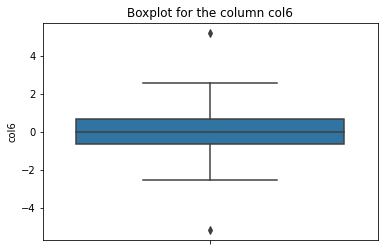

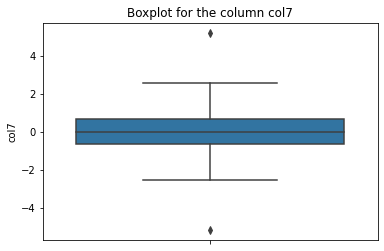

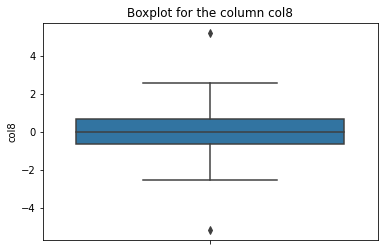

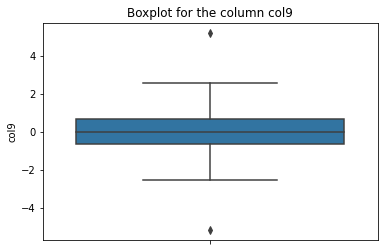

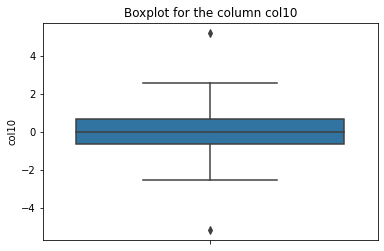

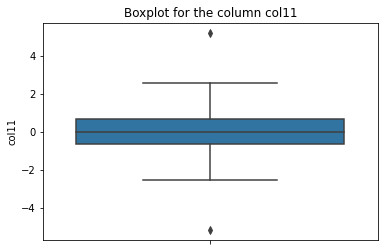

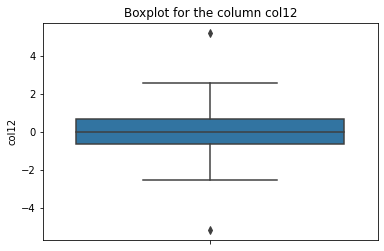

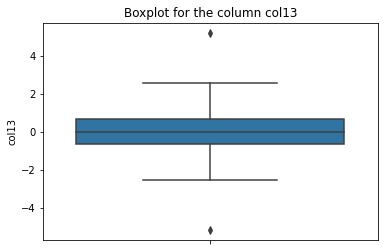

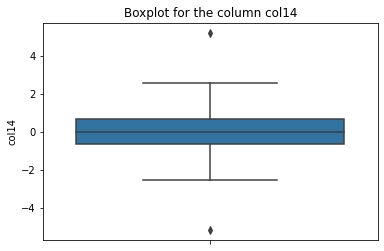

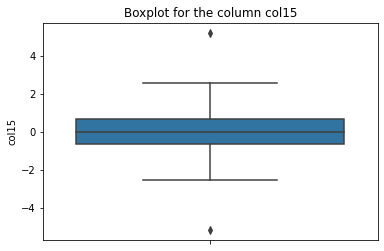

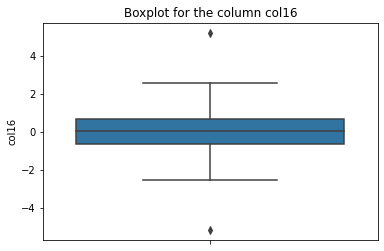

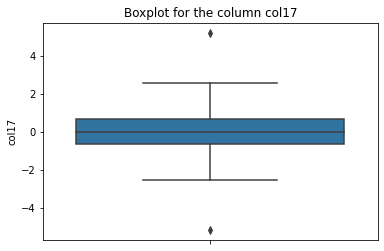

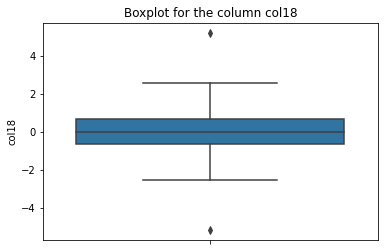

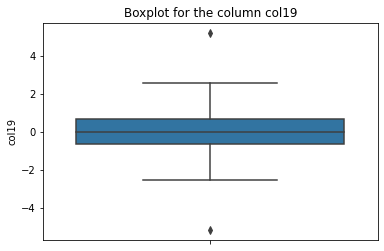

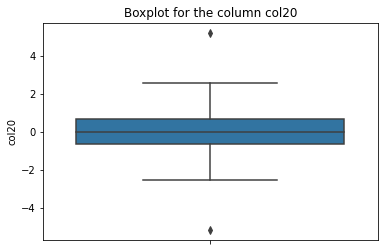

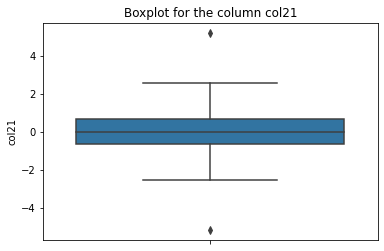

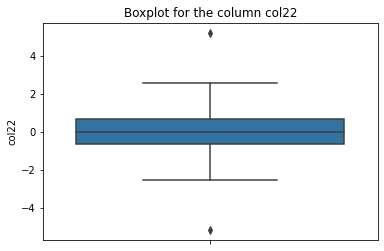

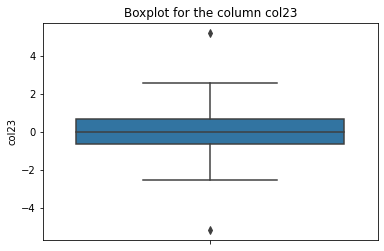

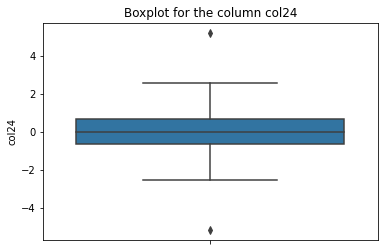

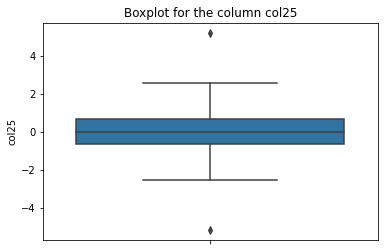

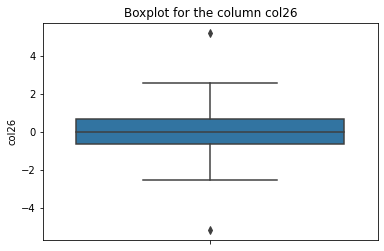

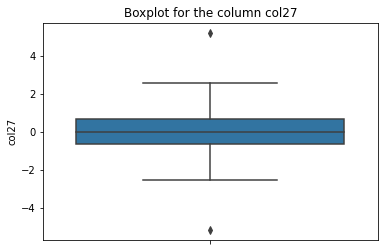

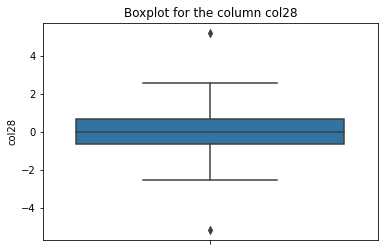

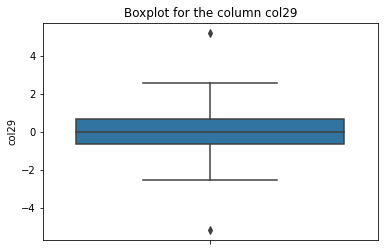

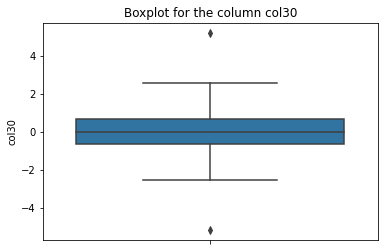

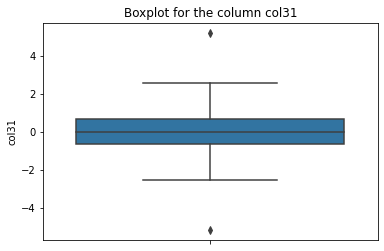

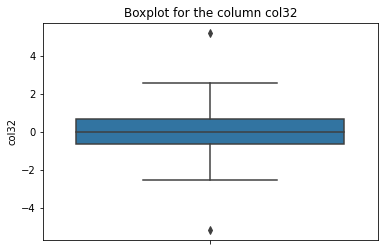

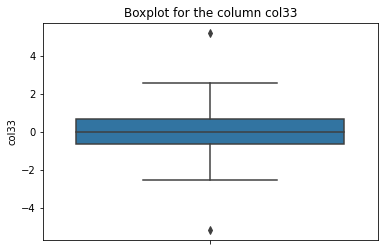

In [60]:
box(data_qu)

The method of quantile Transformer has reduced the Outliers in the data. There exists only 2 data points which are outliers. Hence we proceed with the method of removal using Interquartile Range

#### InterQuartile Range

In [61]:
q1=data_qu.quantile(0.25)
q3=data_qu.quantile(0.75)
iqr=q3-q1

In [62]:
data_final=data_qu[~((data_qu>(q3+1.5*iqr))|(data_qu<(q1-1.5*iqr)))]
data_final

,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33
0,-0.263872,0.198518,1.272922,0.153286,0.237611,-0.540529,-0.885968,-0.646792,-0.398373,-0.134002,0.290317,0.398373,1.217668,0.134002,0.357374,-1.244820,-1.217668,-0.237611,-1.048483,-0.198518,-0.121174,0.211513,1.217668,0.070039,2.310720e-01,-1.165900,-1.165900,-0.760927,-1.332362,-0.848896,-0.296959
1,0.391495,0.166174,NaN,0.343843,0.211513,1.302067,2.047499,1.805056,1.526427,1.688212,2.047499,1.431509,-0.744039,1.590709,1.506341,0.101968,1.217668,0.885968,0.350600,1.244820,1.332362,1.070790,-2.164098,1.467898,1.117082e+00,0.924300,1.743661,1.688212,1.874121,1.506341,1.332362
2,1.805056,1.272922,-1.217668,1.165900,1.191385,-1.272922,-0.370970,-0.343843,-0.159727,1.363932,-0.290317,0.185557,-1.637515,0.121174,0.555314,-0.031815,0.496858,-0.198518,0.710882,1.302067,0.795374,0.943984,-1.637515,0.646792,1.005366e+00,-1.217668,-0.070039,-0.511306,0.570221,1.332362,0.146852
3,2.320672,-2.320672,-0.412186,-2.164098,-2.320672,2.570599,2.320672,1.217668,0.710882,2.047499,NaN,-0.159727,-0.031815,-0.185557,-1.070790,1.141151,2.047499,1.005366,0.885968,2.570599,1.874121,-1.953491,-0.555314,-1.743661,-2.164098e+00,2.320672,2.164098,1.431509,1.688212,NaN,2.570599
4,-0.337101,0.953965,-2.164098,1.048483,1.026686,-0.159727,0.031815,0.646792,0.694594,-0.364163,-0.440053,0.710882,-1.093643,0.760927,0.744039,1.874121,-0.277071,1.026686,0.924300,-0.070039,0.830792,0.398373,NaN,0.482513,4.400533e-01,-0.343843,-1.117082,-0.019087,-0.405270,-1.396924,-0.662557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,-0.984493,1.590709,0.070039,1.467898,1.590709,-2.570599,-1.117082,-1.332362,-0.662557,-0.744039,-2.047499,2.047499,1.688212,2.047499,1.953491,-1.302067,-0.089186,-0.867283,1.070790,0.848896,0.211513,0.924300,-1.005366,0.812955,9.243004e-01,NaN,-1.805056,-2.164098,-1.805056,-2.047499,-2.320672
194,-1.231130,-0.511306,1.953491,-0.540529,-0.482513,-0.662557,-0.795374,-0.159727,-0.600425,-0.710882,-0.134002,-0.904968,1.093643,-1.332362,-0.812955,-0.006362,-0.570221,-0.570221,-0.848896,0.511306,-0.384635,-0.812955,1.688212,-0.943984,-7.273606e-01,-0.786675,-0.812955,-0.848896,-1.093643,-0.303615,-0.370970
195,-0.812955,-0.057289,1.506341,-0.153286,-0.070039,-1.070790,-1.637515,-1.396924,-1.272922,-0.511306,-1.590709,0.303615,0.585256,0.031815,0.121174,0.357374,-1.070790,-0.303615,-1.117082,0.964041,-2.047499,0.019087,1.117082,-0.146852,-1.391458e-16,-0.848896,-1.506341,-1.637515,-1.743661,0.412186,-2.047499
196,-1.874121,1.302067,0.263872,1.363932,1.332362,0.412186,1.026686,1.191385,1.272922,-0.070039,0.426078,1.396924,-0.943984,1.506341,1.431509,0.310284,0.555314,0.727361,0.678489,-0.662557,0.250720,1.637515,-0.330375,1.805056,1.506341e+00,0.337101,0.744039,0.678489,1.005366,-0.468267,0.095575


Thus we could see that no rows are removed from the dataset.

## Pairplot